#**Aula 1**

Os estão disponíveis no [Kaggle](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data) e são provenientes do *Berkeley Earth Surface Temperature Study*, que combina 1,6 bilhão de relatórios de temperatura de 16 arquivos pré-existentes. 

🎲 Temos os seguintes datasets:
*   Global Land and Ocean-and-Land Temperatures (GlobalTemperatures.csv)
*   Global Average Land Temperature by Country (GlobalLandTemperaturesByCountry.csv)
* Global Average Land Temperature by State (GlobalLandTemperaturesByState.csv)
*Global Land Temperatures By Major City (GlobalLandTemperaturesByMajorCity.csv)
*Global Land Temperatures By City (GlobalLandTemperaturesByCity.csv)




> Os dados brutos vêm da página de dados do [Berkeley Earth](http://berkeleyearth.org/data/).

*Neste módulo vamos usar o dataset: Global Average Land Temperature by Country*
> O dataset também está disponível no [github](https://github.com/alura-tech/pos-datascience-time-series-forecasting/blob/main/GlobalLandTemperaturesByCountry.csv) 😉

🎯 **Nosso objetivo: prever as médias de temperatura da superfície da terra no Brasil nos próximos anos.**

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('https://github.com/alura-tech/pos-datascience-time-series-forecasting/blob/main/GlobalLandTemperaturesByCountry.csv?raw=True')

In [ ]:
dados.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [ ]:
dados.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe
577461,2013-09-01,NaN,NaN,Zimbabwe


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [ ]:
dados_br = dados.query('Country=="Brazil"')

In [ ]:
dados_br

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
77110,1832-01-01,24.935,1.372,Brazil
77111,1832-02-01,24.505,1.953,Brazil
77112,1832-03-01,24.617,1.359,Brazil
77113,1832-04-01,23.990,2.013,Brazil
77114,1832-05-01,23.124,1.592,Brazil
...,...,...,...,...
79286,2013-05-01,24.906,0.236,Brazil
79287,2013-06-01,24.788,0.251,Brazil
79288,2013-07-01,24.202,0.201,Brazil
79289,2013-08-01,24.736,0.247,Brazil


In [ ]:
dados_nulos = dados_br.isnull().sum()

In [ ]:
dados_nulos

dt                                0
AverageTemperature               17
AverageTemperatureUncertainty    17
Country                           0
dtype: int64

In [ ]:
dados_br.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dados_br.shape

(2164, 4)

In [ ]:
dados_br['AverageTemperature'].describe()

count    2164.000000
mean       24.699256
std         0.978787
min        21.797000
25%        24.022500
50%        24.829500
75%        25.449750
max        27.151000
Name: AverageTemperature, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

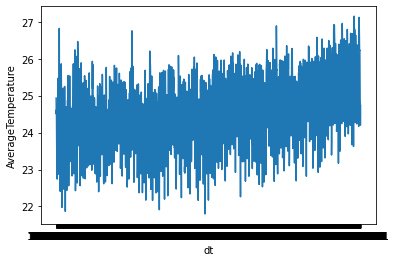

In [ ]:
sns.lineplot(x='dt', y='AverageTemperature', data=dados_br)

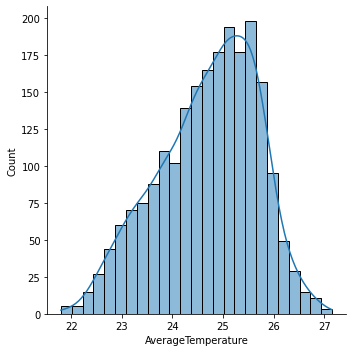

In [ ]:
sns.displot(dados_br['AverageTemperature'], kde=True)

In [ ]:
dados_br['dt'] = pd.to_datetime(dados_br['dt'], format='%Y-%m-%d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dados_br['Month'] = pd.DatetimeIndex(dados_br['dt']).month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dados_br

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
77110,1832-01-01,24.935,1.372,Brazil
77111,1832-02-01,24.505,1.953,Brazil
77112,1832-03-01,24.617,1.359,Brazil
77113,1832-04-01,23.990,2.013,Brazil
77114,1832-05-01,23.124,1.592,Brazil
...,...,...,...,...
79285,2013-04-01,25.464,0.253,Brazil
79286,2013-05-01,24.906,0.236,Brazil
79287,2013-06-01,24.788,0.251,Brazil
79288,2013-07-01,24.202,0.201,Brazil


In [ ]:
temperatura = dados_br.groupby(['Month']).mean()

In [ ]:
temperatura.drop(columns=['AverageTemperatureUncertainty'], axis=1, inplace=True)

In [ ]:
temperatura = temperatura.sort_values(['AverageTemperature'])

In [ ]:
temperatura

,AverageTemperature
Month,
6,23.325945
7,23.332978
5,23.971238
8,24.263823
4,24.615188
9,25.114278
3,25.143144
2,25.258972
1,25.263696


<BarContainer object of 12 artists>

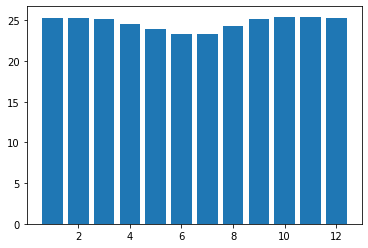

In [ ]:
plt.bar(temperatura.index, temperatura['AverageTemperature'].values)

#**Aula 2**

A biblioteca Prophet é usada para criar modelos onde a série é ajustada considerando características não estacionárias, como tendência e sazonalidade.

O modelo ajustado pelo Prophet é do tipo:

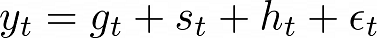

A série usa o termo **g** para modelar a tendência, o **s** para as mudanças periódicas e o **h** para efeitos específicos, como: feriados. O termo de erro **ϵ(𝑡)** representa informações que não foram refletidas no modelo. Geralmente é modelado como ruído distribuído normalmente. 

A tendência pode ser modelada como uma equação de reta. Já, a parte sazonal, utiliza série de Fourier:

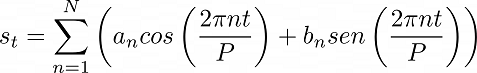

**Exemplo:**

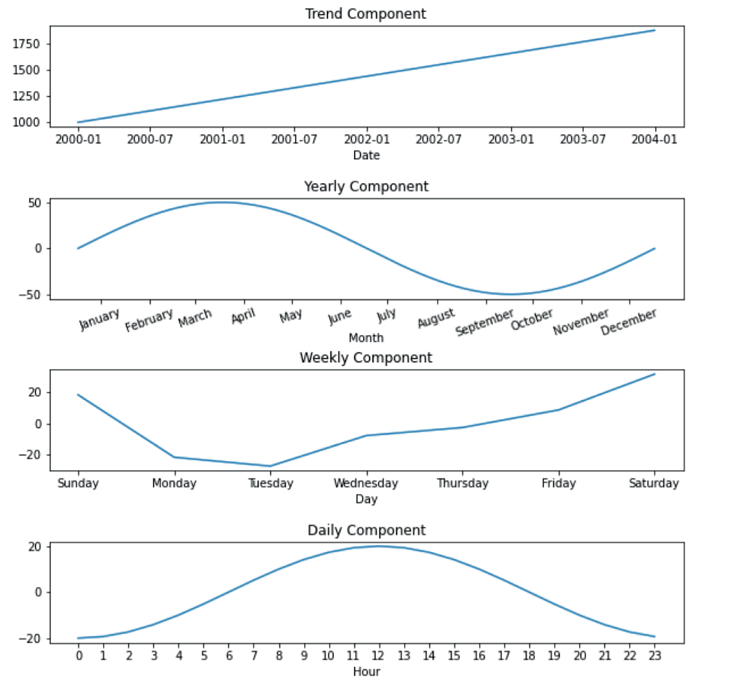

Entendendo a Adição:

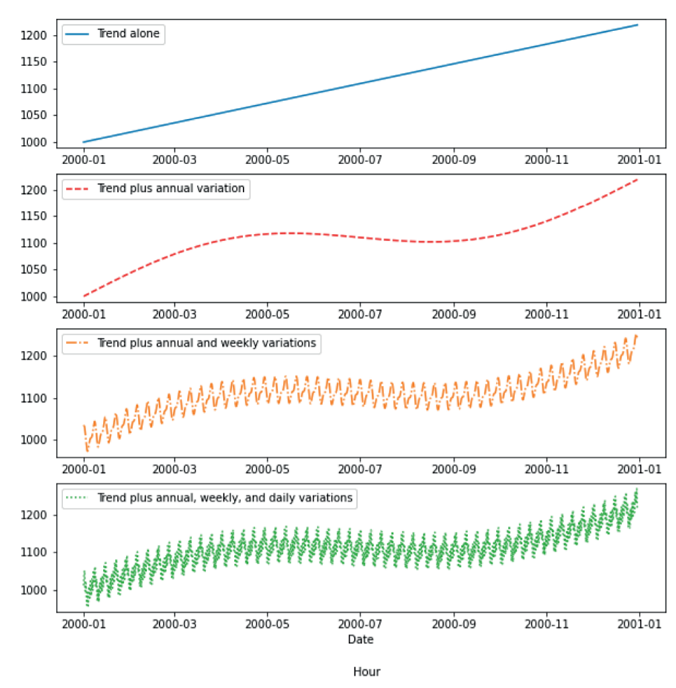

In [ ]:
from fbprophet import Prophet

In [ ]:
df = pd.DataFrame()

In [ ]:
df['ds'] = dados_br['dt']
df['y'] = dados_br['AverageTemperature']

In [ ]:
df

,ds,y
77110,1832-01-01,24.935
77111,1832-02-01,24.505
77112,1832-03-01,24.617
77113,1832-04-01,23.990
77114,1832-05-01,23.124
...,...,...
79285,2013-04-01,25.464
79286,2013-05-01,24.906
79287,2013-06-01,24.788
79288,2013-07-01,24.202


In [ ]:
modelo = Prophet()

In [ ]:
modelo.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
dataFramefuture = modelo.make_future_dataframe(periods=0)

In [ ]:
previsao = modelo.predict(dataFramefuture)

In [ ]:
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1832-01-01,23.962675,23.988495,25.107580,23.962675,23.962675,0.599562,0.599562,0.599562,0.599562,0.599562,0.599562,0.0,0.0,0.0,24.562238
1,1832-02-01,23.963753,23.981630,25.119458,23.963753,23.963753,0.581291,0.581291,0.581291,0.581291,0.581291,0.581291,0.0,0.0,0.0,24.545044
2,1832-03-01,23.964761,23.722382,24.861285,23.964761,23.964761,0.350073,0.350073,0.350073,0.350073,0.350073,0.350073,0.0,0.0,0.0,24.314834
3,1832-04-01,23.965839,23.275053,24.313571,23.965839,23.965839,-0.154052,-0.154052,-0.154052,-0.154052,-0.154052,-0.154052,0.0,0.0,0.0,23.811787
4,1832-05-01,23.966881,22.646239,23.723989,23.966881,23.966881,-0.779618,-0.779618,-0.779618,-0.779618,-0.779618,-0.779618,0.0,0.0,0.0,23.187263


In [ ]:
previsao.head().T

,0,1,2,3,4
ds,1832-01-01 00:00:00,1832-02-01 00:00:00,1832-03-01 00:00:00,1832-04-01 00:00:00,1832-05-01 00:00:00
trend,23.9627,23.9638,23.9648,23.9658,23.9669
yhat_lower,23.9885,23.9816,23.7224,23.2751,22.6462
yhat_upper,25.1076,25.1195,24.8613,24.3136,23.724
trend_lower,23.9627,23.9638,23.9648,23.9658,23.9669
trend_upper,23.9627,23.9638,23.9648,23.9658,23.9669
additive_terms,0.599562,0.581291,0.350073,-0.154052,-0.779618
additive_terms_lower,0.599562,0.581291,0.350073,-0.154052,-0.779618
additive_terms_upper,0.599562,0.581291,0.350073,-0.154052,-0.779618
yearly,0.599562,0.581291,0.350073,-0.154052,-0.779618


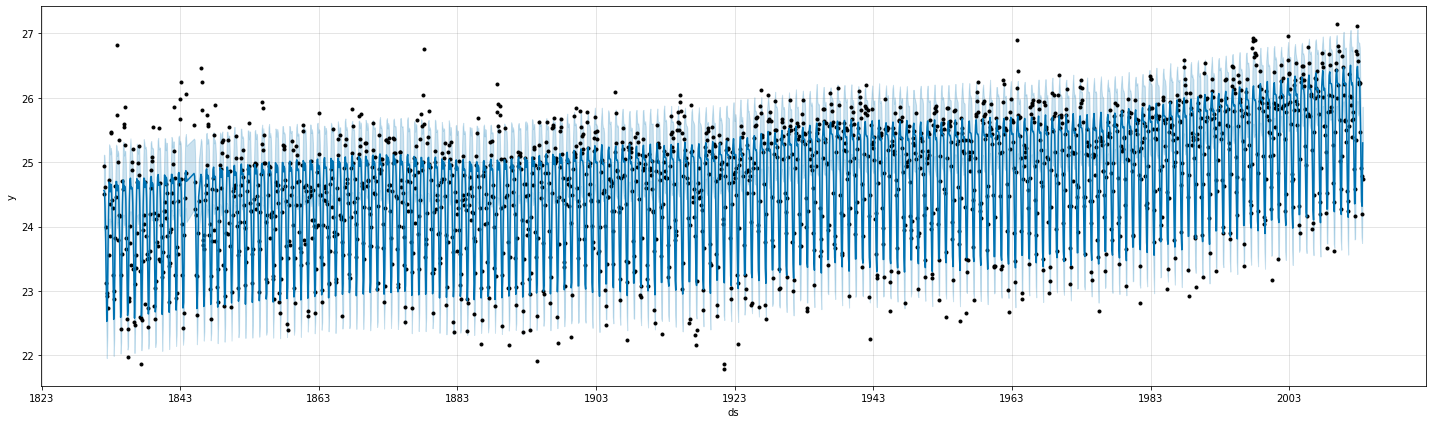

In [ ]:
modelo.plot(previsao, figsize=(20,6));

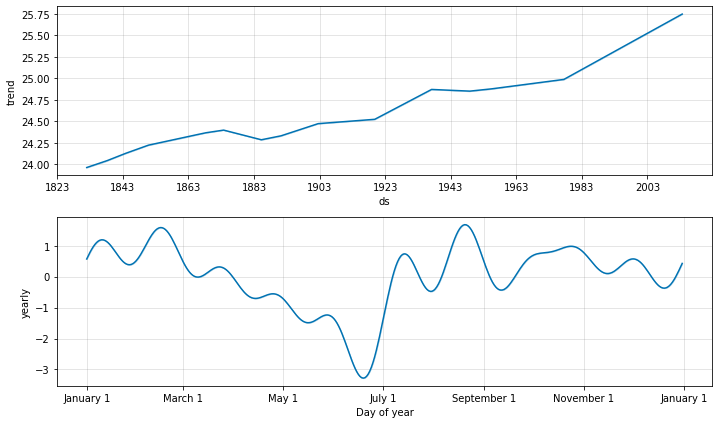

In [ ]:
modelo.plot_components(previsao, figsize=(10,6));

###**Adicionando período de previsão**

In [ ]:
modelo = Prophet()
modelo.fit(df)
dataFramefuture = modelo.make_future_dataframe(periods=120, freq='M')
previsao = modelo.predict(dataFramefuture)
previsao.head()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1832-01-01,23.962675,24.020941,25.144118,23.962675,23.962675,0.599562,0.599562,0.599562,0.599562,0.599562,0.599562,0.0,0.0,0.0,24.562238
1,1832-02-01,23.963753,23.971619,25.105193,23.963753,23.963753,0.581291,0.581291,0.581291,0.581291,0.581291,0.581291,0.0,0.0,0.0,24.545044
2,1832-03-01,23.964761,23.771363,24.878580,23.964761,23.964761,0.350073,0.350073,0.350073,0.350073,0.350073,0.350073,0.0,0.0,0.0,24.314834
3,1832-04-01,23.965839,23.211487,24.347780,23.965839,23.965839,-0.154052,-0.154052,-0.154052,-0.154052,-0.154052,-0.154052,0.0,0.0,0.0,23.811787
4,1832-05-01,23.966881,22.587024,23.734213,23.966881,23.966881,-0.779618,-0.779618,-0.779618,-0.779618,-0.779618,-0.779618,0.0,0.0,0.0,23.187263


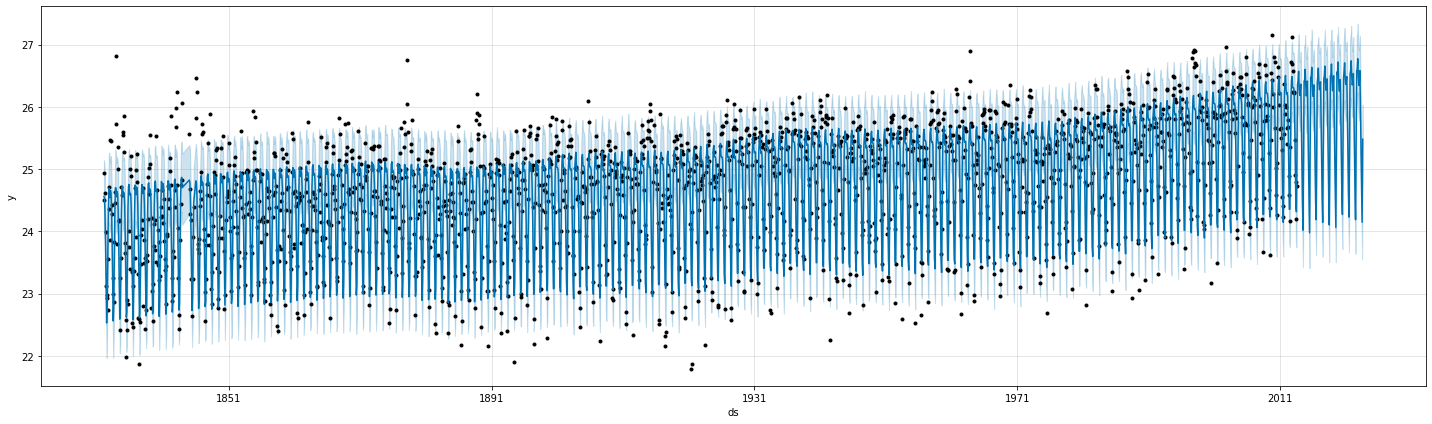

In [ ]:
modelo.plot(previsao, figsize=(20,6));

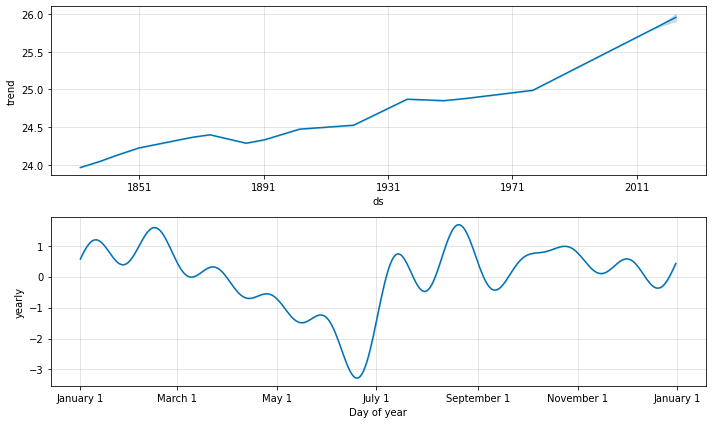

In [ ]:
modelo.plot_components(previsao, figsize=(10,6));